# New Section

In [53]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('/content/BeerDataScienceProject.csv', encoding = "ISO-8859-1", engine='python')

In [55]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [56]:
# Remove two columns name is 'C' and 'D'
df = df.drop(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'review_appearance', 'review_palette', 'beer_name', 'review_taste', 'review_profileName', 'review_aroma', 'review_time'], axis = 1)

In [57]:
df.head()

,beer_style,review_overall,review_text
0,Hefeweizen,1.5,A lot of foam. But a lot. In the smell some ba...
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In ..."
2,Foreign / Export Stout,3.0,"Almost totally black. Beige foam, quite compac..."
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quit..."
4,American Double / Imperial IPA,4.0,"According to the website, the style for the Ca..."


In [58]:
df.shape

(528870, 3)

In [137]:
# 5.	Which Beer style seems to be the favorite based on reviews written by users? 

In [138]:
# in order to be able to make good utilization of the available GPU a sample size of 1000 rows of review_text was used

In [59]:
# Getting first 1000 rows from df
# Getting first 1000 rows from df
df_first_3 = df.iloc[:1000]
  
  


In [60]:
#converting ;review_text' column into list
a = list(df_first_3['review_text'])

In [61]:
# converting list into string and then joining it with space
texts2 = ' '.join(str(e) for e in a)

In [64]:
#Import required NLP libraries
import nltk 
nltk.download('punkt') 

from nltk import sent_tokenize # this helps to split text into Sentences
from nltk import word_tokenize # this helps to split text into individual Words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
#Tokenize the text by sentences for review_text :
sentences = sent_tokenize(texts)
#How many sentences are there? :
print (len(sentences))

9900


In [140]:
# In order to preprocess the sentences and create topics for Analysis, bertopic will be used

In [67]:
pip install bertopic

In [68]:
pip install bertopic[flair]

In [69]:
pip install bertopic[gensim]


In [70]:
pip install bertopic[flair]

In [71]:
pip install bertopic[use]

In [141]:
# extracting Topics from the sentences in review_text

In [72]:
from bertopic import BERTopic
# extracting topics from review_text

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(sentences)

In [142]:
# accessing the frequent topics

In [73]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2973,-1_malty_floral_fruity_fruit
1,0,319,0_pours_pour_tan_white
2,1,315,1_mouthfeel_mouth_carbonated_smooth
3,2,276,2_overall_session_drinking_beers
4,3,215,3_cascade_bitterness_tongue_bittering
...,...,...,...
166,165,11,165_rose_petals_water_backyard
167,166,10,166_butter_buttery_creamybready_gross
168,167,10,167_treaclelike_ipaness_scent_roastiness
169,168,10,168_bitteness_herbed_tang_finishes


In [74]:
topic_model.get_topic(0)

[('pours', 0.030812747407823412),
 ('pour', 0.023946707457846477),
 ('tan', 0.014990386105716532),
 ('white', 0.014093050742780213),
 ('fingers', 0.013694308274158868),
 ('amber', 0.01321657791245145),
 ('yellow', 0.01146861044666551),
 ('color', 0.011440176730640437),
 ('crystal', 0.007737292329199045),
 ('leaves', 0.00770374110880622)]

In [79]:
topic_model.get_topic(1)

[('mouthfeel', 0.06312807583858993),
 ('mouth', 0.020695127929312343),
 ('carbonated', 0.012604614795490222),
 ('smooth', 0.01225519495788172),
 ('creamy', 0.011289771343724435),
 ('oily', 0.010626012718505672),
 ('watery', 0.009012107963359045),
 ('mediumbodied', 0.008335327965102812),
 ('dry', 0.005991019682644559),
 ('stickiness', 0.004978364999549723)]

In [80]:
topic_model.get_topic(2)

[('overall', 0.010784550952496516),
 ('session', 0.010721070342360266),
 ('drinking', 0.009302441045418839),
 ('beers', 0.009040649295500271),
 ('bad', 0.008811268979729114),
 ('drinkable', 0.007237280749470035),
 ('would', 0.00545718023884828),
 ('graphics', 0.005021554220770025),
 ('decent', 0.0050047937717664125),
 ('certainly', 0.004840977810171352)]

In [81]:
topic_model.get_topic(3)

[('cascade', 0.009396966930583221),
 ('bitterness', 0.008714490424194914),
 ('tongue', 0.007346428280299842),
 ('bittering', 0.006762838827171712),
 ('german', 0.006016240394653656),
 ('grassy', 0.005633690329755935),
 ('flavors', 0.0054204367023367745),
 ('herbal', 0.004985661518408579),
 ('hoppiness', 0.004746942770278624),
 ('flavor', 0.004539552272367352)]

In [87]:
topic_model.get_topic(4)

[('ale', 0.055112950213376644),
 ('pale', 0.04183581649960419),
 ('ales', 0.013715195623143023),
 ('dales', 0.013068208123818023),
 ('nevada', 0.008763149705978688),
 ('sierra', 0.008225426206068817),
 ('brown', 0.00708331128363047),
 ('road', 0.005408315309688512),
 ('benchmark', 0.005408315309688512),
 ('deliciously', 0.005029375956316396)]

In [88]:
topic_model.get_topic(5)

[('ipa', 0.0226637011958679),
 ('ipas', 0.020094797204561192),
 ('try', 0.0100004067717999),
 ('favorites', 0.00927760902249063),
 ('knock', 0.008972561503043548),
 ('will', 0.008720495156638251),
 ('recommended', 0.006798526631009031),
 ('nectar', 0.006719987072304435),
 ('buying', 0.006425602439963789),
 ('sure', 0.006208206271455307)]

In [143]:
# Vizualizing the topics

In [82]:
topic_model.visualize_topics()

In [76]:
topic_model.visualize_barchart()

In [77]:
topic_model.get_topic_freq()

,Topic,Count
0,-1,2973
1,0,319
2,1,315
3,2,276
4,3,215
...,...,...
166,165,11
167,166,10
168,167,10
169,168,10


In [144]:
# Creating a heatmap

In [90]:
topic_model.visualize_heatmap()

In [146]:
# Finding out names of bee styles and their popularity

In [107]:
df_first_3['beer_style'].value_counts()

American IPA                        442
American Pale Ale (APA)             170
American Amber / Red Ale            121
Rauchbier                            42
Light Lager                          38
Belgian Strong Dark Ale              36
Russian Imperial Stout               29
American Porter                      21
American Adjunct Lager               14
American Double / Imperial Stout      9
Herbed / Spiced Beer                  9
American Stout                        9
American Blonde Ale                   8
English Bitter                        8
German Pilsener                       7
American Barleywine                   6
American Strong Ale                   4
Dortmunder / Export Lager             3
American Double / Imperial IPA        3
Fruit / Vegetable Beer                3
Oatmeal Stout                         2
English Strong Ale                    2
Low Alcohol Beer                      2
Doppelbock                            1
Euro Strong Lager                     1


In [147]:
# Vizualization

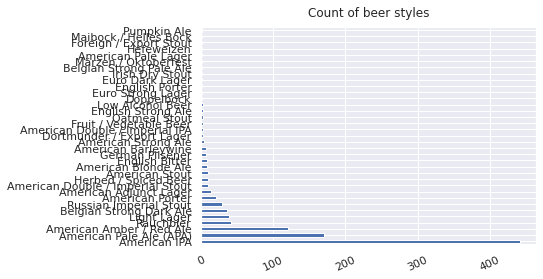

In [110]:
df_first_3['beer_style'].value_counts().plot(kind = 'barh')
plt.title("Count of beer styles", y=1.02);
plt.xticks(rotation=25)
plt.show()

In [153]:
#5: analysing topic 3 and 4 of the review text based on the frequency of topics from the beer style. 
# The beer style that seems to be the favourite is German Pilsener,all Ales American Pale Ale (APA), American Blonde Ale and American Amber / Red Ale 

In [154]:
# 6.	How does written review compare to overall review score for the beer styles?

In [155]:
df_first_3['review_overall']

0      1.5
1      3.0
2      3.0
3      3.0
4      4.0
      ... 
995    3.0
996    4.0
997    3.0
998    3.0
999    2.5
Name: review_overall, Length: 1000, dtype: float64

In [156]:
# Both reviews have hierachy and also frequency in review_overall can be counted while frequency in review_text can also be counted from their topcs.

In [157]:
# 7.	How do find similar beer drinkers by using written reviews only?   

In [158]:
# I will create a cluster for this using sentences in review_text

In [159]:
# converting the sentences to numerical data using embedding

In [114]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(sentences, show_progress_bar=True)

Batches:   0%|          | 0/310 [00:00<?, ?it/s]

In [160]:
# we use UMap to lower the dimensionality of the embeddings

In [115]:
pip install umap-learn

In [117]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [162]:
# HDBSCAN is used to cluster the topics in the sentences

In [118]:
pip install hdbscan

In [ ]:
pip install hdbscan

In [119]:

import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [163]:
# Visualizing the clusters

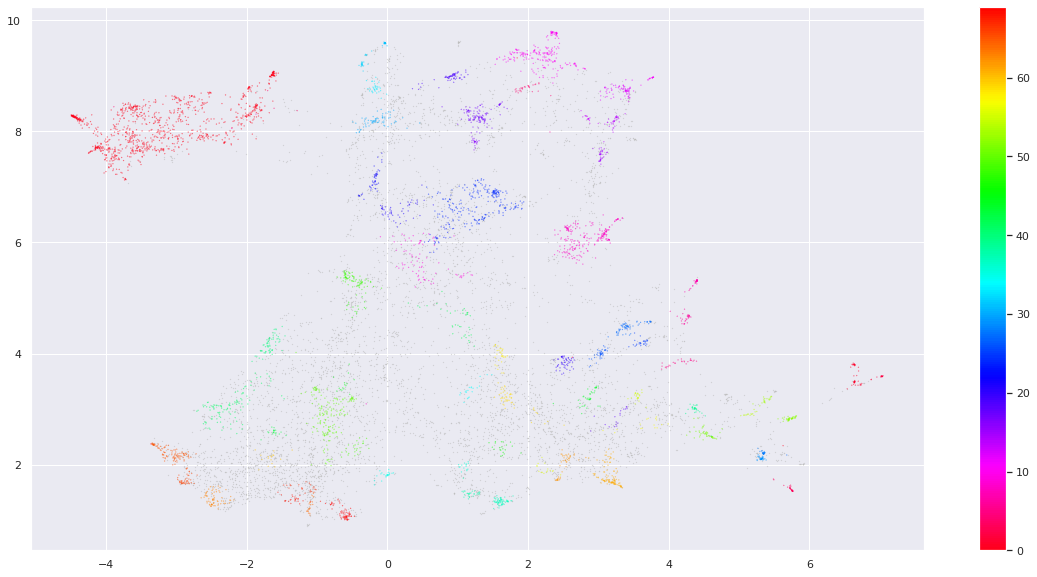

In [120]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [164]:
# It is difficult to visualize the individual clusters due to the number of topics generated (~55). However, we can see that even in 2-dimensional space some local structure is kept.

In [165]:
# Topic Creation

In [122]:
docs_df = pd.DataFrame(sentences, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [124]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(sentences))

In [166]:
#Topic representation

In [167]:
# In order to create a topic representation, we take the top 20 words per topic based on their c-TF-IDF scores. The higher the score, the more representative it should be of its topic as the score is a proxy of information density.

In [125]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,5417
1,0,1019
25,24,227
9,8,225
11,10,223
51,50,171
18,17,118
62,61,108
66,65,106
42,41,104


In [168]:
# topics 1, 25, 9, and 11 are the largest clusters

In [169]:
# Viewing the words in the topics

In [170]:
top_n_words[1][:19]

[('12oz', 0.4757638779632365),
 ('12', 0.4546329685965158),
 ('oz', 0.3293749924360868),
 ('2009', 0.25520541071773634),
 ('sampled', 0.18940823379690025),
 ('vintage', 0.17517351054665958),
 ('09', 0.16432727294868105),
 ('2010', 0.1616092028950722),
 ('2011', 0.1591778063798916),
 ('reviewed', 0.1591778063798916),
 ('date', 0.1277706551536854),
 ('unknown', 0.12464119611468573),
 ('18', 0.12464119611468573),
 ('jul', 0.12021531807696602),
 ('savor', 0.12021531807696602),
 ('14', 0.11678234036443971),
 ('20', 0.11678234036443971),
 ('poured', 0.10598608684725444),
 ('11', 0.10208216428709453)]

In [132]:
top_n_words[25][:10]

[('ipa', 0.5357779576609829),
 ('love', 0.4168322425094285),
 ('great', 0.19075709683688158),
 ('quality', 0.171797752284729),
 ('gotta', 0.1610550123237962),
 ('happy', 0.14424653649263358),
 ('man', 0.13841471069709707),
 ('really', 0.11478643784040045),
 ('nice', 0.10751557875094894),
 ('ooooh', 0.10000315256655087)]

In [133]:
top_n_words[9][:10]

[('little', 0.10496733062134186),
 ('taste', 0.08995087878527158),
 ('bit', 0.08545417320594438),
 ('aroma', 0.07102206819168921),
 ('nice', 0.06260400788029938),
 ('good', 0.06015861501918258),
 ('flavor', 0.05758430782090519),
 ('hoppy', 0.056903539109359684),
 ('pretty', 0.05297496520705122),
 ('sweet', 0.05220704047899454)]

In [134]:
top_n_words[11][:10]

[('micro', 3.5604242472214227),
 ('period', 2.025419436863643),
 ('leaf', 1.0127097184318214),
 ('conditioned', 0.906797485883421),
 ('zounds', 0.0),
 ('failing', 0.0),
 ('factored', 0.0),
 ('faculty', 0.0),
 ('fade', 0.0),
 ('faded', 0.0)]

In [136]:
top_n_words[51][:10]

[('tap', 0.4020855178405021),
 ('portland', 0.18843424047213714),
 ('house', 0.15510346365886052),
 ('served', 0.14361981972661225),
 ('fridge', 0.10806743776321082),
 ('pint', 0.10442562046208394),
 ('caldera', 0.10233981700479308),
 ('brass', 0.09277978494388073),
 ('pub', 0.09277978494388073),
 ('horse', 0.09124515255747834)]

In [ ]:
# from clusters of the topics. beer drinkers having similar reviews were group together